In [1]:
# importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib

from prophet import Prophet
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
# importing the Data into dataframe
df = pd.read_csv('CustomerLoyaltyMemberDetails.csv',sep =",")
pd.set_option('display.max_columns', None)
df.head()

,Loyalty Number,First Name,Last Name,Customer Name,Country,Province or State,StateAbbr,City,Latitude,Longitude,Postal Code,Education,Location Code,Income,Order Year,Quarter,MonthsAsMember,LoyaltyStatus,Product Line,Coupon Response,Coupon Count,Quantity Sold,Target Sales,Unit Sale Price,Unit Cost,Revenue,Planned Revenue,Customer Lifetime Value,Loyalty Count
0,100018,Mina,Smida,Mina Smida,Canada,Alberta,AB,Edmonton,53.544389,-113.490927,T9G 1W3,Bachelor,Rural,82877,2019,Q2,48,Elite,Photography,Coupon 2,1,3,3,136,115.60,408,399.84,7919.20,1
1,100018,Mina,Smida,Mina Smida,Canada,Alberta,AB,Edmonton,53.544389,-113.490927,T9G 1W3,Bachelor,Rural,82877,2020,Q2,48,Elite,Photography,Coupon 2,1,3,1,136,115.60,408,403.92,7919.20,1
2,100018,Mina,Smida,Mina Smida,Canada,Alberta,AB,Edmonton,53.544389,-113.490927,T9G 1W3,Bachelor,Rural,82877,2021,Q2,48,Elite,Photography,Coupon 2,1,3,2,136,115.60,408,399.84,7919.20,1
3,100055,Sadie,Straseskie,Sadie Straseskie,Germany,Bayern,BY,Nurnberg,49.452102,11.076665,90451,High School or Below,Urban,16645,2017,Q4,46,Bronze,Computers and Home Office,Coupon 4,1,7,7,1062,902.70,7434,7285.32,39769.56,1
4,100102,Rigoberto,Palacio,Rigoberto Palacio,Canada,Ontario,ON,Toronto,43.653226,-79.383184,M1R 4K3,College,Urban,0,2016,Q3,56,Elite,Photography,Coupon 1,1,1,1,351,298.35,351,340.47,2887.74,1


In [3]:
print(df['Order Year'])

0         2019
1         2020
2         2021
3         2017
4         2016
          ... 
127481    2016
127482    2018
127483    2018
127484    2021
127485    2021
Name: Order Year, Length: 127486, dtype: int64


In [4]:
ph_df = df.loc[(df['Product Line'] == 'Photography' ) & (df['Order Year'].isin([2016,2017,2018,2019,2020,2021]))]
#ph_df= df[(df['Product Line'] == 'Photography') & (df['Order Year'].isin(['2016','2017','2018','2019','2020','2021']) )]
#dataFrame.query('Product Line  == 'Photography' & Age < 40 & JOB.str.startswith("C").values')
ph_df.head()

,Loyalty Number,First Name,Last Name,Customer Name,Country,Province or State,StateAbbr,City,Latitude,Longitude,Postal Code,Education,Location Code,Income,Order Year,Quarter,MonthsAsMember,LoyaltyStatus,Product Line,Coupon Response,Coupon Count,Quantity Sold,Target Sales,Unit Sale Price,Unit Cost,Revenue,Planned Revenue,Customer Lifetime Value,Loyalty Count
0,100018,Mina,Smida,Mina Smida,Canada,Alberta,AB,Edmonton,53.544389,-113.490927,T9G 1W3,Bachelor,Rural,82877,2019,Q2,48,Elite,Photography,Coupon 2,1,3,3,136,115.60,408,399.84,7919.20,1
1,100018,Mina,Smida,Mina Smida,Canada,Alberta,AB,Edmonton,53.544389,-113.490927,T9G 1W3,Bachelor,Rural,82877,2020,Q2,48,Elite,Photography,Coupon 2,1,3,1,136,115.60,408,403.92,7919.20,1
2,100018,Mina,Smida,Mina Smida,Canada,Alberta,AB,Edmonton,53.544389,-113.490927,T9G 1W3,Bachelor,Rural,82877,2021,Q2,48,Elite,Photography,Coupon 2,1,3,2,136,115.60,408,399.84,7919.20,1
4,100102,Rigoberto,Palacio,Rigoberto Palacio,Canada,Ontario,ON,Toronto,43.653226,-79.383184,M1R 4K3,College,Urban,0,2016,Q3,56,Elite,Photography,Coupon 1,1,1,1,351,298.35,351,340.47,2887.74,1
13,100171,Guillermina,Tradup,Guillermina Tradup,United Kingdom,Brighton and Hove,JI,Eley Drive,50.816015,-0.065917,BN2 7FG,Master,Suburban,26802,2018,Q4,40,Silver,Photography,Coupon 2,1,13,12,96,81.60,1248,1198.08,4636.55,1


#### Question 1 --> From 2016-2021, which ORDER_YEAR had the lowest QUANTITY_SO0LD for Photography products?
This Visual Shows total sold quantities by year for photography product line excluding 2022 data , so the lowest year in total quantity was 2017

Text(0, 0.5, 'Quantity Sold')

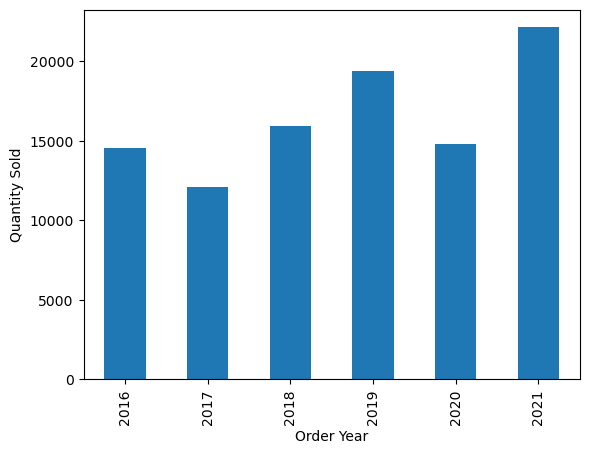

In [5]:
PhByYear = ph_df.groupby(ph_df['Order Year'])['Quantity Sold'].sum()
PhByYear.plot.bar()
plt.ylabel("Quantity Sold")

#### Question 2 --> Which PRODUCT_LINE has the highest QUANTITY_SOLD?
this shows that highest product line in sold quantities is TV and Video Gaming

<Axes: xlabel='Product Line'>

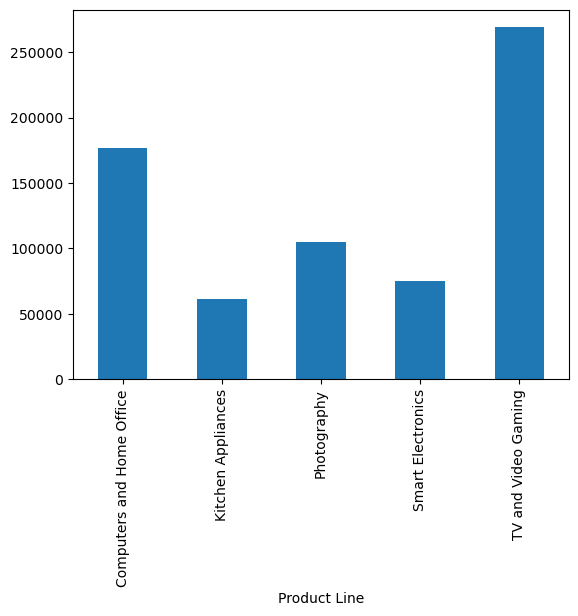

In [6]:
#plotting a visual shows total quantity sold by product line
df.groupby(df['Product Line'])['Quantity Sold'].sum().plot.bar()

#### Question 3 --> Which EDUCATION of the loyalty members had the highest amount of QUANTITY_SOLD in 2020?

this visual shows that bachelor degree clients had the highest amount of QUANTITY_SOLD in 2020

<Axes: xlabel='Education'>

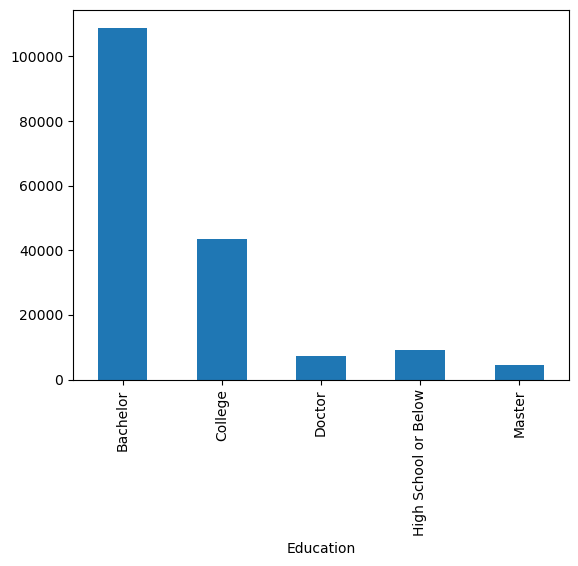

In [7]:
df2020 = df.loc[df['Order Year']==2020]
df2020.groupby(df['Education'])['Quantity Sold'].sum().plot.bar()

#### Question 4 --> What is the CUSTOMER_NAME who provided the highest REVENUE in 2022?

the plot below shows the Gil Frever has highest Revnue in 2022

In [8]:
# top client in revnue in 2022
df2022 = df.loc[df['Order Year']==2022].groupby(df['Customer Name'])['Revenue'].agg(['sum'])
topClient2022 = df2022.reset_index().sort_values(['sum'], ascending=[ 0]).set_index('Customer Name').head(1)
topClient2022

,sum
Customer Name,
Gil Frever,39339


#### Question 5 --> visualization of Percentage and values of Revenue vs Planned Revenue.

(-1.1049990510772458, 1.2049801406419403, -1.100097156250054, 1.10204074649074)

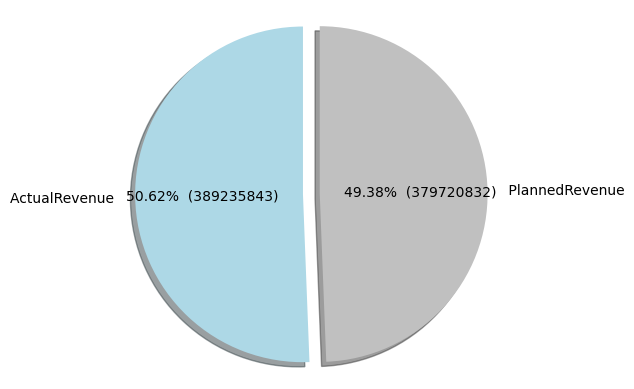

In [9]:
Revenue = df['Revenue'].sum()
PlannedRevenue =df['Planned Revenue'].sum()   ## Calculating values

labels = ['ActualRevenue ',' PlannedRevenue'] #setting the plot labels\

sizes = [Revenue, PlannedRevenue]
colors = ['LightBlue', 'silver'] #setting the plot colors
explode = (0,.1)

def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct=make_autopct(sizes), shadow=True, startangle=90)
plt.axis('equal')

#### Question 6 --> visualization of Percentage and values of quantity sold Vs. Target

(-1.1049996644465128,
 1.2049930695602122,
 -1.101206287300857,
 1.1000574422524219)

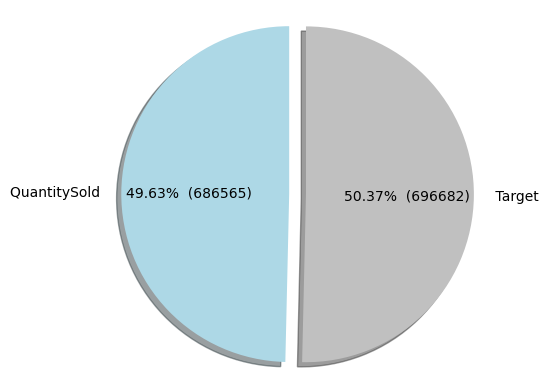

In [10]:
QuantitySold = df['Quantity Sold'].sum()
Target =df['Target Sales'].sum()   ## Calculating values

labels = ['QuantitySold ',' Target'] #setting the plot labels\

sizes = [QuantitySold, Target]
colors = ['LightBlue', 'silver'] #setting the plot colors
explode = (0,.1)

def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct=make_autopct(sizes), shadow=True, startangle=90)
plt.axis('equal')

#### Question 7 --> visualization of Quantity Sold by Order Year and Quarter colored by Product Line

C:\Users\Zbook\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Zbook\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


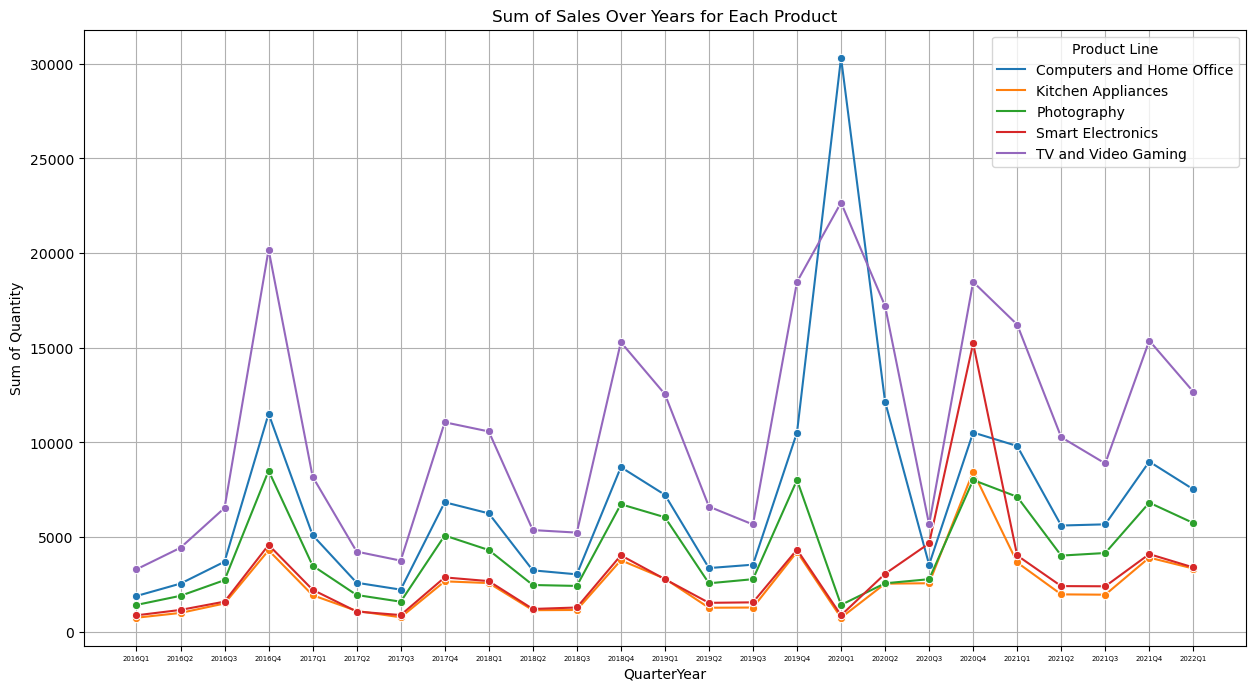

In [11]:
# Adding Column Q-Y
df['QuarterYear'] = df["Order Year"].astype(str) + df['Quarter']

# Grouping the data
grouped_df = df.groupby(['QuarterYear', 'Product Line'])['Quantity Sold'].sum().reset_index()

# Plot the data
plt.figure(figsize=(15, 8))
sns.lineplot(data=grouped_df, x='QuarterYear', y='Quantity Sold', hue='Product Line', marker='o')

# Adding titles and labels
plt.title('Sum of Sales Over Years for Each Product')
plt.xlabel('QuarterYear')
plt.ylabel('Sum of Quantity')
plt.legend(title='Product Line')
plt.grid(True)


# Set the font size for x-axis labels
plt.xticks(fontsize=5)

# Show the plot
plt.show()

#### Question 8 --> visualization of Forecast and predict the expected quantity sold (Range accepted) for all products in Q2 2023 with confidence level 95% based on historical data

In [12]:
# Create a function to get the first date of each quarter

def get_quarter_start(year, quarter):
    if quarter == "Q1":
        return pd.Timestamp(f'{year}-01-01')
    elif quarter == "Q2":
        return pd.Timestamp(f'{year}-04-01')
    elif quarter == "Q3":
        return pd.Timestamp(f'{year}-07-01')
    elif quarter == "Q4":
        return pd.Timestamp(f'{year}-10-01')

# Apply the function to create the 'Quarter Start' column
df['Quarter Start'] = df.apply(lambda row: get_quarter_start(row['Order Year'], row['Quarter']), axis=1)

# Display the DataFrame
df.head()

,Loyalty Number,First Name,Last Name,Customer Name,Country,Province or State,StateAbbr,City,Latitude,Longitude,Postal Code,Education,Location Code,Income,Order Year,Quarter,MonthsAsMember,LoyaltyStatus,Product Line,Coupon Response,Coupon Count,Quantity Sold,Target Sales,Unit Sale Price,Unit Cost,Revenue,Planned Revenue,Customer Lifetime Value,Loyalty Count,QuarterYear,Quarter Start
0,100018,Mina,Smida,Mina Smida,Canada,Alberta,AB,Edmonton,53.544389,-113.490927,T9G 1W3,Bachelor,Rural,82877,2019,Q2,48,Elite,Photography,Coupon 2,1,3,3,136,115.60,408,399.84,7919.20,1,2019Q2,2019-04-01
1,100018,Mina,Smida,Mina Smida,Canada,Alberta,AB,Edmonton,53.544389,-113.490927,T9G 1W3,Bachelor,Rural,82877,2020,Q2,48,Elite,Photography,Coupon 2,1,3,1,136,115.60,408,403.92,7919.20,1,2020Q2,2020-04-01
2,100018,Mina,Smida,Mina Smida,Canada,Alberta,AB,Edmonton,53.544389,-113.490927,T9G 1W3,Bachelor,Rural,82877,2021,Q2,48,Elite,Photography,Coupon 2,1,3,2,136,115.60,408,399.84,7919.20,1,2021Q2,2021-04-01
3,100055,Sadie,Straseskie,Sadie Straseskie,Germany,Bayern,BY,Nurnberg,49.452102,11.076665,90451,High School or Below,Urban,16645,2017,Q4,46,Bronze,Computers and Home Office,Coupon 4,1,7,7,1062,902.70,7434,7285.32,39769.56,1,2017Q4,2017-10-01
4,100102,Rigoberto,Palacio,Rigoberto Palacio,Canada,Ontario,ON,Toronto,43.653226,-79.383184,M1R 4K3,College,Urban,0,2016,Q3,56,Elite,Photography,Coupon 1,1,1,1,351,298.35,351,340.47,2887.74,1,2016Q3,2016-07-01


11:39:29 - cmdstanpy - INFO - Chain [1] start processing
11:39:30 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Zbook\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Zbook\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


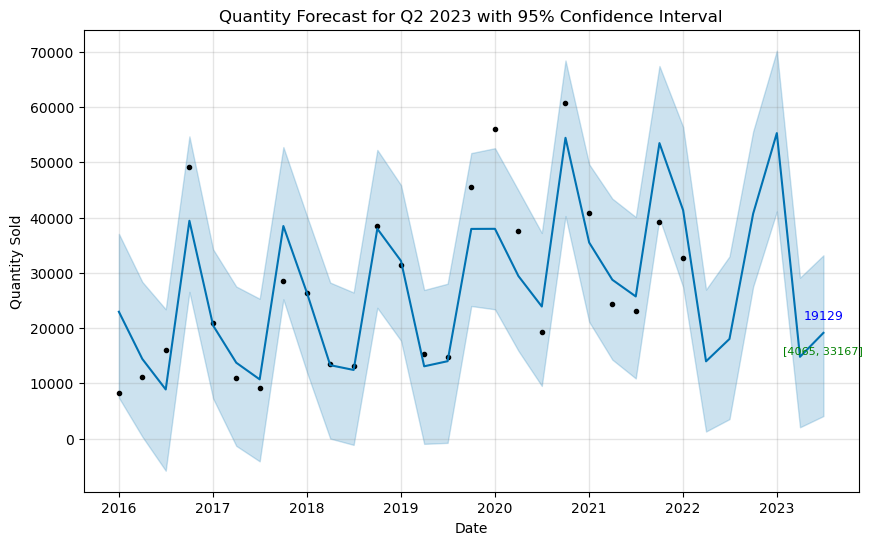

           ds          yhat   yhat_lower    yhat_upper
30 2023-06-30  19128.901728  4065.172027  33166.877962


In [13]:
# Grouping the data
grouped_df_qrtr = df.groupby(['Quarter Start'])['Quantity Sold'].sum().reset_index()

# Convert the Date column to datetime
grouped_df_qrtr['Quarter Start'] = pd.to_datetime(grouped_df_qrtr['Quarter Start'])

# Prepare data for Prophet
df_prophet = grouped_df_qrtr.rename(columns={'Quarter Start': 'ds', 'Quantity Sold': 'y'})

# Initialize and fit the Prophet model
model = Prophet(interval_width=0.95)
model.fit(df_prophet)

# Make future dataframe for 2023-Q2 (April, May, June)
future_dates = model.make_future_dataframe(periods=6, freq='Q')
forecast = model.predict(future_dates)

# Filter the forecast for Q2 2023
q2_2023_forecast = forecast[(forecast['ds'] >= '2023-04-01') & (forecast['ds'] <= '2023-06-30')]

# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))
model.plot(forecast, ax=ax)

# Annotate the forecasted values for Q2 2023
for _, row in q2_2023_forecast.iterrows():
    ax.annotate(f"{row['yhat']:.0f}", (row['ds'], row['yhat']),
                textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='blue')
    ax.annotate(f"[{row['yhat_lower']:.0f}, {row['yhat_upper']:.0f}]", (row['ds'], row['yhat']),
                textcoords="offset points", xytext=(0, -15), ha='center', fontsize=8, color='green')

# Customize the plot
plt.title('Quantity Forecast for Q2 2023 with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

# Display the forecast for Q2 2023
print(q2_2023_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])